In [207]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [256]:
data=pd.read_csv("insurance.csv")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle as pkl

In [209]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [210]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

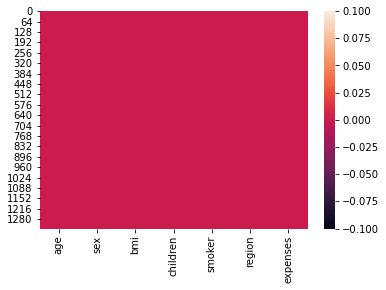

In [212]:
sns.heatmap(data.isnull())

In [75]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

<AxesSubplot:xlabel='sex', ylabel='count'>

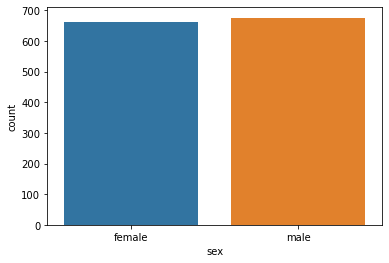

In [76]:
sns.countplot(data["sex"])

<AxesSubplot:xlabel='region', ylabel='count'>

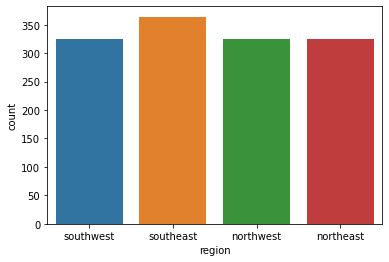

In [77]:
sns.countplot(data["region"],)

In [78]:
data.head(1)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92


In [92]:
data.sex=pd.get_dummies(data.sex)

(array([ 30., 129., 232., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([16.  , 19.71, 23.42, 27.13, 30.84, 34.55, 38.26, 41.97, 45.68,
        49.39, 53.1 ]),
 <BarContainer object of 10 artists>)

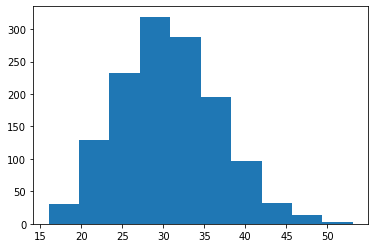

In [94]:
plt.hist(data.bmi)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.87 ,  7386.726, 13651.582, 19916.438, 26181.294, 32446.15 ,
        38711.006, 44975.862, 51240.718, 57505.574, 63770.43 ]),
 <BarContainer object of 10 artists>)

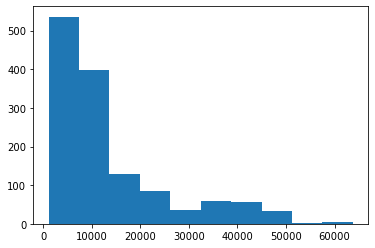

In [95]:
plt.hist(data.expenses)

(array([676.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 662.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

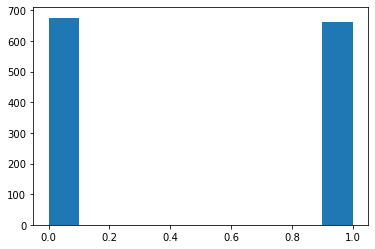

In [96]:
plt.hist(data.sex)

In [98]:
data.head(0)

,age,sex,bmi,children,smoker,region,expenses


(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1064.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

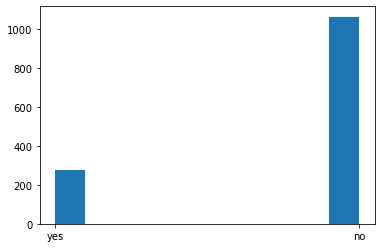

In [101]:
plt.hist(data.smoker)

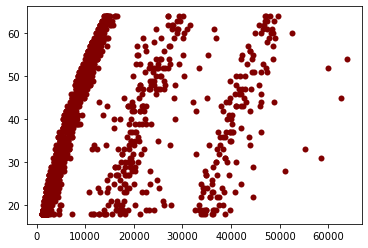

In [117]:
plt.scatter(data.expenses,data.age,color="maroon",
                linewidths=800)

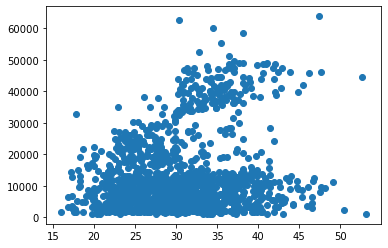

In [118]:
plt.scatter(data.bmi,data.expenses)

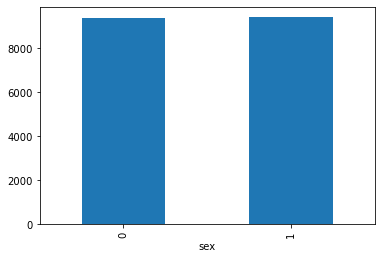

In [119]:
data.groupby("sex")['expenses'].median().plot.bar()
plt.show()

<AxesSubplot:xlabel='children'>

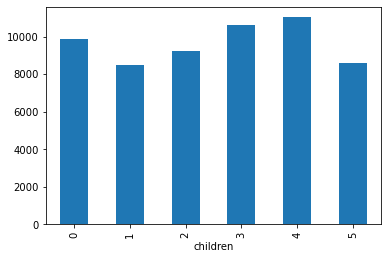

In [122]:
data.groupby("children")["expenses"].median().plot.bar()

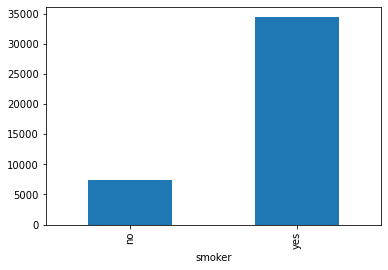

In [123]:
data.groupby("smoker")['expenses'].median().plot.bar()
plt.show()

<AxesSubplot:xlabel='age'>

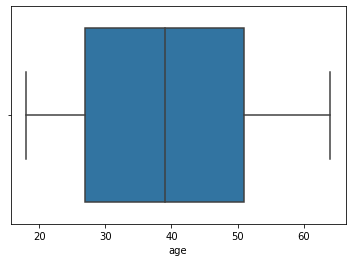

In [124]:
sns.boxplot(data.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x27a966b1d60>,
 'caps': [<matplotlib.lines.Line2D at 0x27a966bf460>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a966b19d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27a966bfac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a966bfdf0>],
 'means': []}

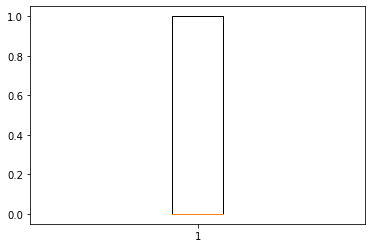

In [125]:
plt.boxplot(data.sex)

{'whiskers': [<matplotlib.lines.Line2D at 0x27a96846100>,
 'caps': [<matplotlib.lines.Line2D at 0x27a968467c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a96837d00>],
 'medians': [<matplotlib.lines.Line2D at 0x27a96846e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a9684f220>],
 'means': []}

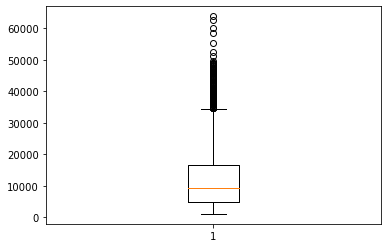

In [126]:
plt.boxplot(data.expenses)

In [127]:
data.corr()

,age,sex,bmi,children,expenses
age,1.000000,0.020856,0.109341,0.042469,0.299008
sex,0.020856,1.000000,-0.046380,-0.017163,-0.057292
bmi,0.109341,-0.046380,1.000000,0.012645,0.198576
children,0.042469,-0.017163,0.012645,1.000000,0.067998
expenses,0.299008,-0.057292,0.198576,0.067998,1.000000


<AxesSubplot:>

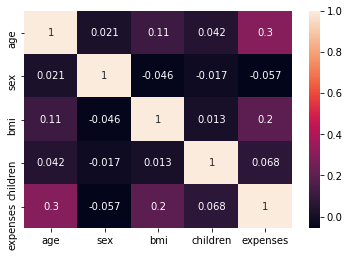

In [129]:
sns.heatmap(data.corr(),annot=True)

In [136]:
data.region=pd.get_dummies(data.region)
data.smoker=pd.get_dummies(data.smoker)

In [137]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,0,1725.55
2,28,0,33.0,3,0,0,4449.46
3,33,0,22.7,0,0,0,21984.47
4,32,0,28.9,0,0,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,0,10600.55
1334,18,1,31.9,0,0,1,2205.98
1335,18,1,36.9,0,0,0,1629.83
1336,21,1,25.8,0,0,0,2007.95


In [138]:
num_feature=["age","bmi","children"]
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_feature=["sex","bmi","smoker"]
cat_transformer=OneHotEncoder(handle_unknown="ignore")
preprocessor=ColumnTransformer(transformers=[
        ( 'num',num_transformer,num_feature),
        ('cat', cat_transformer, cat_feature)])

In [139]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'bmi', 'smoker'])])

In [141]:
x=data.drop(["expenses"],axis=1)
y=data.expenses

data.to_csv("cleaned_data.csv")

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [143]:
x_train.shape

(1070, 6)

In [145]:
y_test.shape

(268,)

In [246]:
models=[]
models.append(Pipeline(steps=[("preprocessor",preprocessor),("linear_regression",LinearRegression())]))
models.append(Pipeline(steps=[("preprocessor",preprocessor),("Decission_tree",DecisionTreeRegressor())]))
models.append(Pipeline(steps=[("preprocessor",preprocessor),("svm",SVR())]))
models.append(Pipeline(steps=[("preprocessor",preprocessor),("gradient_boost",GradientBoostingRegressor())]))
models.append(Pipeline(steps=[("preprocessor",preprocessor),("rf",RandomForestRegressor())]))

In [251]:
#to be fixed
results=[]
names=[]
rmse=[]
mse=[]
res=[]
for name,model in models:
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mean_sq_err=mean_squared_error(y_test,y_pred)
    root_mean_sq_err=mean_squared_error(y_test,y_pred,squared=False)
    r2score=r2_score(y_test,y_pred)
    res.append(r2score)
    names.append(name)
    mse.append(mean_sq_err)
    rmse.append(root_mean_sq_err)
    print(" {}r2score  {}rmse  {}mse".format(res,rmse,mse))

 [0.7993476114410867]r2score  [5650.646614132986]rmse  [31929807.157812577]mse
 [0.7993476114410867, 0.7243047966869842]r2score  [5650.646614132986, 6623.546443524224]rmse  [31929807.157812577, 43871367.48952239]mse
 [0.7993476114410867, 0.7243047966869842, -0.10367821195024174]r2score  [5650.646614132986, 6623.546443524224, 13252.481766812014]rmse  [31929807.157812577, 43871367.48952239, 175628272.97968486]mse
 [0.7993476114410867, 0.7243047966869842, -0.10367821195024174, 0.8967947130901646]r2score  [5650.646614132986, 6623.546443524224, 13252.481766812014, 4052.5366725690155]rmse  [31929807.157812577, 43871367.48952239, 175628272.97968486, 16423053.482516747]mse
 [0.7993476114410867, 0.7243047966869842, -0.10367821195024174, 0.8967947130901646, 0.8735217376057987]r2score  [5650.646614132986, 6623.546443524224, 13252.481766812014, 4052.5366725690155, 4486.254697311574]rmse  [31929807.157812577, 43871367.48952239, 175628272.97968486, 16423053.482516747, 20126481.209150165]mse


In [252]:
gb_reg = (Pipeline(steps=[("preprocessor",preprocessor),("gradient_boost",GradientBoostingRegressor())]))

gb_reg.fit(x_train, y_train)

# Predicting the moodel
y_pred = gb_reg.predict(x_test)

# Evaluation Metrics
gb_reg_mse = mean_squared_error(y_test, y_pred)
gb_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
gb_reg_r2_score = r2_score(y_test, y_pred)

print("The mean square error using GBoost is {}".format(gb_reg_mse))
print("The root mean_squared error using GBoost is {}".format(gb_reg_rmse))
print("The r2 score using GBoost is {}".format(gb_reg_r2_score))

The mean square error using GBoost is 19724954.44047196
The root mean_squared error using GBoost is 4441.2784691428615
The r2 score using GBoost is 0.8760450007375622


In [260]:
pkl.dump(gb_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))

From the above observation we can say that the performance (RMSE & R-sqaured) of Gradient boosting model is good as compared to other models. So we will save Gradient boosting model for further testing of the data using pickle library.